# Machine learning: regression

We'll try to predict missing well logs using regression.

The data are from Colorado. We've already loaded the data into a CSV.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
well_logs = 'https://geocomp.s3.amazonaws.com/data/Colorado_wells.csv.zip'

In [3]:
df = pd.read_csv(well_logs, index_col=0)

In [10]:
df.describe()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT
count,396571.000000,396571.000000,390209.000000,386045.000000,396241.000000,394789.000000,388661.000000,389977.000000,392578.000000
mean,47.199818,2006.378918,8.173011,115.664645,-26.063578,8.718017,1.712450,2.541765,84.399025
std,28.037796,286.510339,0.556594,35.948221,184.768790,37.503786,7.263193,2.403070,11.065214
min,1.000000,1321.917600,2.980800,3.090000,-848.849399,0.133100,-1.027000,-811.401500,-2.996000
25%,21.000000,1778.508000,7.836000,101.417700,-171.557200,2.751800,0.212600,2.519700,78.257500
50%,47.000000,1982.724000,8.010500,113.061400,16.230400,3.733300,0.262800,2.559400,86.151100
75%,71.000000,2200.198800,8.410800,126.983600,123.327100,6.351000,0.297200,2.589000,92.165875
max,96.000000,2810.560800,14.785900,2160.508497,662.844700,2000.000000,88.737900,3.033000,144.353400


Look at the counts: some of the features have some NaNs. It looks like we won't lose too much data by doing a `dropna`...

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT
count,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000
mean,47.225472,1995.871411,8.180444,115.675550,-27.623898,8.668765,1.720565,2.554715,84.519552
std,28.078715,280.941906,0.544270,35.933887,184.177299,37.330737,7.283658,0.070295,11.007295
min,1.000000,1321.917600,4.500000,3.090000,-486.306900,0.133100,-1.027000,1.178000,-2.996000
25%,21.000000,1773.021600,7.839900,101.427300,-172.861100,2.739300,0.213300,2.519500,78.471825
50%,47.000000,1971.751200,8.013000,113.062800,15.046550,3.696100,0.263300,2.559200,86.238700
75%,71.000000,2185.263600,8.416400,126.982825,121.592100,6.213875,0.297300,2.588800,92.227875
max,96.000000,2782.671600,14.785900,2160.508497,662.844700,2000.000000,88.737900,3.033000,144.353400


In [9]:
df.head()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT
0,1.0,1681.5816,8.5207,114.6138,58.7831,7.4246,0.1960,2.5989,76.6762
1,1.0,1681.7340,8.5652,113.3488,58.7735,7.4886,0.1916,2.5859,76.5024
2,1.0,1681.8864,8.5683,119.9841,59.0329,7.5989,0.1851,2.5830,75.9684
3,1.0,1682.0388,8.5203,121.0104,59.2197,7.7094,0.1894,2.5882,75.7419
4,1.0,1682.1912,8.4563,118.1462,59.9868,7.7865,0.1956,2.5906,76.5455


I'd prefer it if the well names were integers not floats.

In [10]:
df.Well = df.Well.astype(int)

In [11]:
df.head()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT
0,1,1681.5816,8.5207,114.6138,58.7831,7.4246,0.1960,2.5989,76.6762
1,1,1681.7340,8.5652,113.3488,58.7735,7.4886,0.1916,2.5859,76.5024
2,1,1681.8864,8.5683,119.9841,59.0329,7.5989,0.1851,2.5830,75.9684
3,1,1682.0388,8.5203,121.0104,59.2197,7.7094,0.1894,2.5882,75.7419
4,1,1682.1912,8.4563,118.1462,59.9868,7.7865,0.1956,2.5906,76.5455


# Visual inspection of the data space

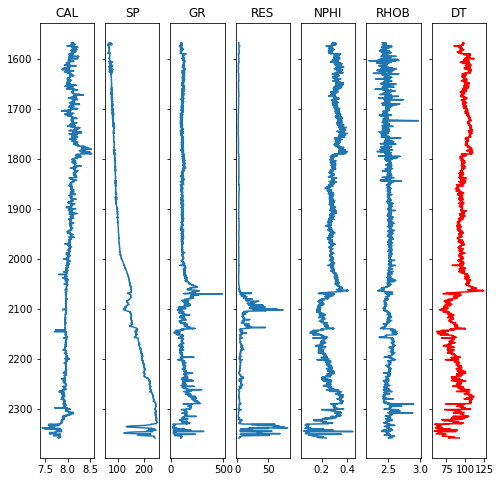

In [12]:
well = 10

features = ['CAL', 'SP', 'GR', 'RES', 'NPHI', 'RHOB']
target = 'DT'

fig, axs = plt.subplots(ncols=len(features)+1, sharey=True, figsize=(8,8))

for ax, feature in zip(axs, features):
    ax.plot(df.loc[df.Well==well, feature], df.loc[df.Well==well, 'Depth'])
    ax.set_title(feature)
axs[-1].plot(df.loc[df.Well==well, target], df.loc[df.Well==well, 'Depth'], color='red')
axs[-1].set_title(target)
axs[-1].invert_yaxis()

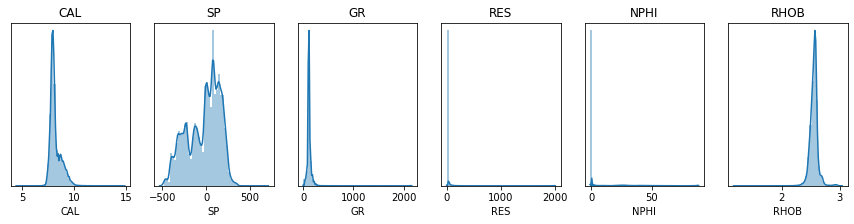

In [13]:
fig, axs = plt.subplots(ncols=len(features), figsize=(15, 3))

for ax, feature in zip(axs, features):
    ax = sns.distplot(df[feature], ax=ax)
    ax.set_title(feature)
    ax.set_yticks([])

Make a 'log<sub>10</sub> resisitivity' to deal with the usual RES distribution. Call it `LogRes`.

In [14]:
df['LogRes'] = np.log10(df.RES)

In [15]:
df.describe()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT,LogRes
count,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000,385830.000000
mean,47.225472,1995.871411,8.180444,115.675550,-27.623898,8.668765,1.720565,2.554715,84.519552,0.669115
std,28.078715,280.941906,0.544270,35.933887,184.177299,37.330737,7.283658,0.070295,11.007295,0.362624
min,1.000000,1321.917600,4.500000,3.090000,-486.306900,0.133100,-1.027000,1.178000,-2.996000,-0.875822
25%,21.000000,1773.021600,7.839900,101.427300,-172.861100,2.739300,0.213300,2.519500,78.471825,0.437640
50%,47.000000,1971.751200,8.013000,113.062800,15.046550,3.696100,0.263300,2.559200,86.238700,0.567744
75%,71.000000,2185.263600,8.416400,126.982825,121.592100,6.213875,0.297300,2.588800,92.227875,0.793363
max,96.000000,2782.671600,14.785900,2160.508497,662.844700,2000.000000,88.737900,3.033000,144.353400,3.301030


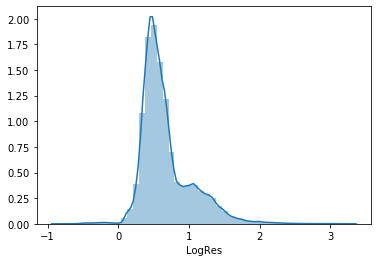

In [16]:
sns.distplot(df.LogRes)

And update the `features` list:

In [17]:
features.remove('RES')
features.append('LogRes')

Now look at the gamma ray. Are the very high values coming from one well or from lots of places? 

Decide how to fix the gamma ray. For example, you could:

- Remove one or more wells with bad GR.
- Remove only the rows with very high values.
- Clip the GR, e.g. using `pd.Series.clip()`.

In [18]:
df.Well[df.GR > 500].unique()

array([ 5,  8, 11, 18, 19, 23, 25, 34, 41, 45, 48, 51, 55])

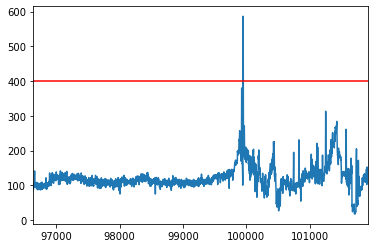

In [19]:
df.GR[df.Well==18].plot()
plt.axhline(400, c='red')

In [20]:
df.GR = df.GR.clip(upper=400)

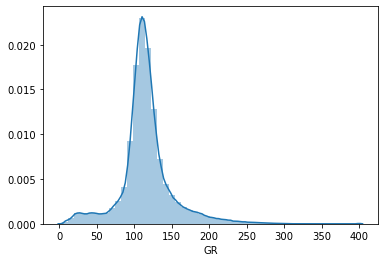

In [21]:
sns.distplot(df.GR)

What is causing the long tail in the NPHI data? Is it spikes or a bad log?

Decide how best to fix the NPHI, limiting its range to the interval 0 to 0.5.

(0, 0.4)

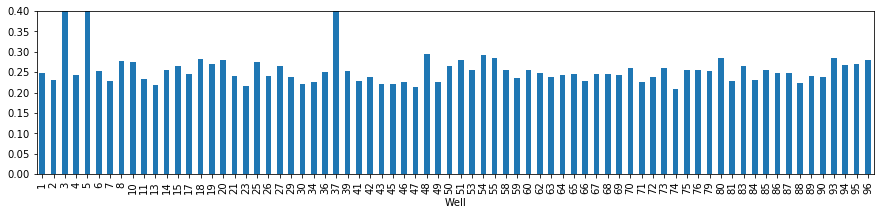

In [22]:
# Checking that means look reasonable.
plt.figure(figsize=(15, 3))
df.groupby('Well').NPHI.mean().plot(kind='bar')
plt.ylim(0, 0.4)

In [23]:
# I don't trust wells 3 and 5, because the means are so high
df = df[df.Well != 3]
df = df[df.Well != 5]

In [24]:
def fix_nphi(df):
    # If mean > 1, divide well's NPHI by 100.
    for _, group in df.groupby('Well'):
        if group.NPHI.mean() > 1:
            df.NPHI.loc[group.index] /= 100
    return df

df = fix_nphi(df)

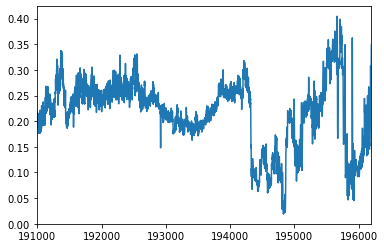

In [25]:
# Check that well 37 is fixed.
df.NPHI.loc[df.Well==37].plot()

In [26]:
# Now apply hard limits.
df = df[(0 <= df.NPHI) & (df.NPHI <= 0.5)]

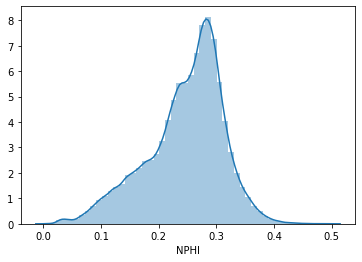

In [27]:
sns.distplot(df.NPHI)

The distributions should now look something like this:

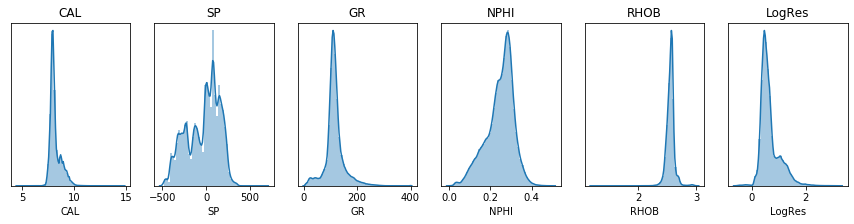

In [28]:
fig, axs = plt.subplots(ncols=len(features), figsize=(15, 3))

for ax, feature in zip(axs, features):
    ax = sns.distplot(df[feature], ax=ax)
    ax.set_title(feature)
    ax.set_yticks([])

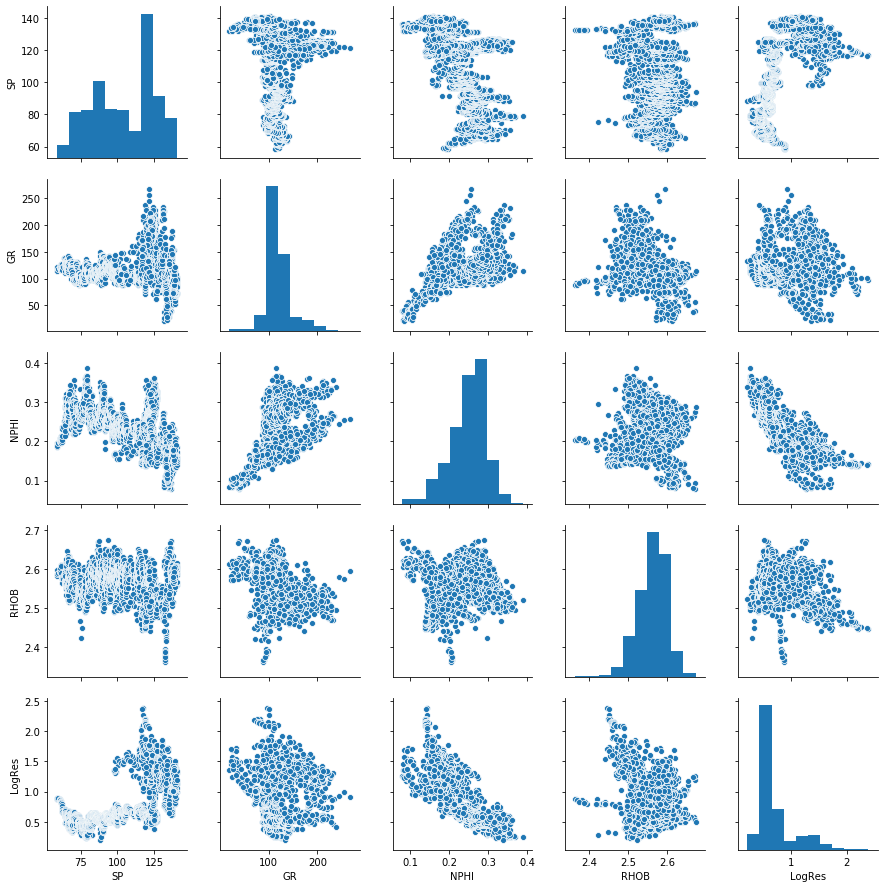

In [29]:
sns.pairplot(df[df.Well == 1.0], vars=features[1:])

In [30]:
df.describe()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT,LogRes
count,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000
mean,48.749342,1991.943299,8.170411,115.934702,-33.758562,8.713519,0.246389,2.555263,84.544651,0.670805
std,27.358198,278.823638,0.543051,34.948990,184.320366,37.458588,0.066340,0.068756,10.930134,0.361925
min,1.000000,1321.917600,4.500000,3.090000,-486.306900,0.245800,0.001900,1.178000,-2.996000,-0.609418
25%,25.000000,1771.192800,7.833200,101.767450,-186.755300,2.756400,0.209400,2.519900,78.546700,0.440342
50%,48.000000,1968.398400,8.001000,113.295200,5.514900,3.711600,0.258600,2.559700,86.180200,0.569561
75%,71.000000,2179.624800,8.377700,127.214950,108.387150,6.194750,0.292100,2.589100,92.195350,0.792024
max,96.000000,2782.671600,14.785900,400.000000,662.844700,2000.000000,0.499700,3.033000,144.353400,3.301030


## Method chaining

Some people like chaining Pandas' methods into long 'pipelines'. 

In [31]:
df.query('NPHI > 0.4')  # df.query() is nice... and it returns a df

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT,LogRes
32566,7,1803.0444,9.3370,126.1515,-148.1435,1.9797,0.4006,2.4809,106.2110,0.296599
35504,7,2250.7956,8.9797,205.2569,-103.9367,3.2786,0.4033,2.3779,109.5664,0.515688
35617,7,2268.0168,8.7470,171.0163,-100.8801,2.1761,0.4256,2.3688,86.8888,0.337679
35618,7,2268.1692,9.0726,172.8251,-100.8878,2.0467,0.4145,2.2731,90.9953,0.311054
35619,7,2268.3216,9.0026,166.5519,-100.8793,1.7529,0.4048,2.2519,109.4524,0.243757
...,...,...,...,...,...,...,...,...,...,...
465376,96,2331.2628,7.9514,211.7454,158.2206,5.9922,0.4058,2.4942,90.2116,0.777586
465386,96,2332.7868,7.9546,212.5176,160.1685,5.9415,0.4032,2.5198,90.7791,0.773896
465387,96,2332.9392,7.9606,214.5592,160.1190,5.9556,0.4098,2.5256,91.3591,0.774926
465388,96,2333.0916,7.9736,221.6000,159.9349,5.9749,0.4049,2.5318,91.7793,0.776331


In [32]:
def log_res(df):
    df['LogRes'] = np.log10(df.RES)
    return df

dz = (pd.read_csv(well_logs, index_col=0)
        .dropna()
        .pipe(log_res)
        .query('(Well != 3) & (Well != 5)')
     )

### Exercise

This implemented some of our pipeline; can you implement the other things we did?

- Clip the GR curve, eg at 400 API.
- Fix the NPHI by applying the `fix_nphi` function we already made.
- Apply limits to the NPHI curve as before (0 to 0.5).

In [33]:
def fix_gamma(df):
    
    # YOUR CODE HERE

    return df


dz = (pd.read_csv(well_logs, index_col=0)
        .dropna()
        .pipe(log_res)
        .query('(Well != 3) & (Well != 5)')

        # YOUR CODE HERE

     )

In [35]:
def log_res(df):
    df['LogRes'] = np.log10(df.RES)
    return df

def fix_gamma(df):
    df.GR = df.GR.clip(upper=400)
    return df

dz = (pd.read_csv(well_logs, index_col=0)
        .dropna()
        .pipe(log_res)
        .pipe(fix_gamma)
        .query('(Well != 3) & (Well != 5)')
        .pipe(fix_nphi)
        .query('(NPHI >= 0) & (NPHI <= 0.5)')
     )

In [36]:
# You should end up with 372611 records.
len(dz) == 372611

True

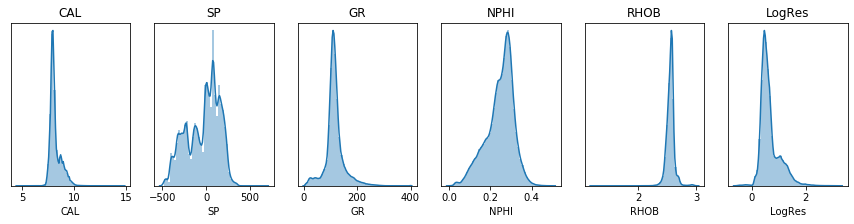

In [37]:
fig, axs = plt.subplots(ncols=len(features), figsize=(15, 3))

for ax, feature in zip(axs, features):
    ax = sns.distplot(dz[feature], ax=ax)
    ax.set_title(feature)
    ax.set_yticks([])

In [38]:
dz.describe()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT,LogRes
count,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000,372611.000000
mean,48.749342,1991.943299,8.170411,115.934702,-33.758562,8.713519,0.246389,2.555263,84.544651,0.670805
std,27.358198,278.823638,0.543051,34.948990,184.320366,37.458588,0.066340,0.068756,10.930134,0.361925
min,1.000000,1321.917600,4.500000,3.090000,-486.306900,0.245800,0.001900,1.178000,-2.996000,-0.609418
25%,25.000000,1771.192800,7.833200,101.767450,-186.755300,2.756400,0.209400,2.519900,78.546700,0.440342
50%,48.000000,1968.398400,8.001000,113.295200,5.514900,3.711600,0.258600,2.559700,86.180200,0.569561
75%,71.000000,2179.624800,8.377700,127.214950,108.387150,6.194750,0.292100,2.589100,92.195350,0.792024
max,96.000000,2782.671600,14.785900,400.000000,662.844700,2000.000000,0.499700,3.033000,144.353400,3.301030


## Feature engineering

In [39]:
features = ['GR', 'NPHI', 'RHOB', 'LogRes']
target = 'DT'

### Combination features

In [40]:
from itertools import combinations

combs = combinations(features[:4], 2)
list(combs)

[('GR', 'NPHI'),
 ('GR', 'RHOB'),
 ('GR', 'LogRes'),
 ('NPHI', 'RHOB'),
 ('NPHI', 'LogRes'),
 ('RHOB', 'LogRes')]

In [41]:
combs = combinations(features[:4], 2)
for f1, f2 in combs:
    new_feature = f'{f1}.{f2}'
    df[new_feature] = df[f1] * df[f2]
    if new_feature not in features:
        features.append(new_feature)

In [42]:
features

['GR',
 'NPHI',
 'RHOB',
 'LogRes',
 'GR.NPHI',
 'GR.RHOB',
 'GR.LogRes',
 'NPHI.RHOB',
 'NPHI.LogRes',
 'RHOB.LogRes']

### Empirical features

In [44]:
df['InvGardner'] = 108 * df.RHOB**4

if 'InvGardner' not in features:
    features.append('InvGardner')

### Smoothed features - using `rolling` (fiddly, see below)

In [ ]:
med_len = 21

dg = df.groupby('Well').rolling(med_len, center=True, min_periods=1).median()

In [189]:
dg.head()

Well      Depth      CAL         GR        SP      RES     NPHI     RHOB  \
0 0   1.0  1682.3436  8.42180  119.00550  60.80310  7.42460  0.19840  2.59230   
  1   1.0  1682.4198  8.41535  119.06515  61.02945  7.39730  0.19765  2.59185   
  2   1.0  1682.4960  8.42180  119.12480  61.25580  7.37000  0.19840  2.59140   
  3   1.0  1682.5722  8.43905  119.06515  61.29490  7.30385  0.19865  2.59125   
  4   1.0  1682.6484  8.45630  119.12480  61.33400  7.23770  0.19890  2.59110   

           DT    LogRes  
0 0  76.92570  0.870673  
  1  76.93635  0.869070  
  2  76.94700  0.867467  
  3  77.08675  0.863534  
  4  77.22650  0.859601

In [190]:
dg = dg[features]
dg = dg.rename(columns={col: col+'_smooth' for col in dg.columns})
dg.head()

GR_smooth  NPHI_smooth  RHOB_smooth  LogRes_smooth
0 0  119.00550      0.19840      2.59230       0.870673
  1  119.06515      0.19765      2.59185       0.869070
  2  119.12480      0.19840      2.59140       0.867467
  3  119.06515      0.19865      2.59125       0.863534
  4  119.12480      0.19890      2.59110       0.859601

In [182]:
# This is a pain in the rear
pd.concat([df, dg], axis=1)

TypeError: object of type 'int' has no len()

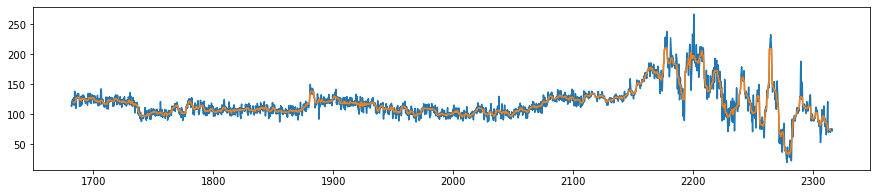

In [136]:
well= 1
log = 'GR'

plt.figure(figsize=(15,3))
plt.plot(df.loc[df.Well==well].Depth, df.loc[df.Well==well][log])
plt.plot(dg.loc[dg.Well==well].Depth, dg.loc[dg.Well==well][log])

### Smoothed features

In [45]:
df['NPHI_smooth'] = 0
for name, group in df.groupby('Well'):
    df.NPHI_Smooth.loc[group.index] = np.convolve(group.NPHI.copy(),
                                                  np.ones(21)/21,
                                                  mode='same')

if 'NPHI_smooth' not in features:
    features.append('NPHI_smooth')

/home/matt/anaconda3/envs/geocomp-ml/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


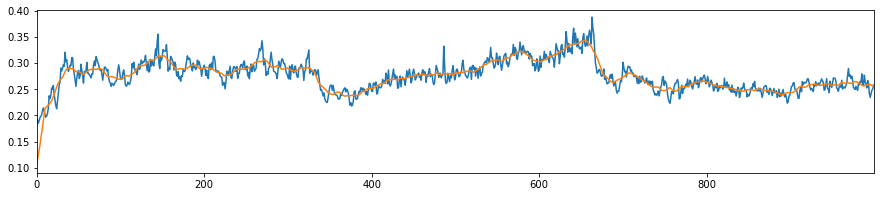

In [46]:
plt.figure(figsize=(15,3))
df.NPHI[:1000].plot()
df.NPHI_Smooth[:1000].plot()

### Polynomial features

These don't really seem to help.

In [75]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)

In [76]:
# X_train_poly = poly.fit_transform(X_train)
# X_val_poly = poly.fit_transform(X_val)

In [77]:
# X_train_poly.shape

### Nonlinear transformations

In [47]:
df['NPHI_sq'] = df.NPHI ** 2.0

if 'NPHI_sq' not in features:
    features.append('NPHI_sq')

In [48]:
# df['RHOB_sq'] = df.RHOB ** 2.0
# df['RHOB_sr'] = df.RHOB ** 0.5
# Etc.

In [50]:
features

['GR',
 'NPHI',
 'RHOB',
 'LogRes',
 'GR.NPHI',
 'GR.RHOB',
 'GR.LogRes',
 'NPHI.RHOB',
 'NPHI.LogRes',
 'RHOB.LogRes',
 'InvGardner',
 'NPHI_Smooth',
 'NPHI_sq']

# Split the dataset

In [51]:
df.Well.unique()

array([ 1,  2,  4,  6,  7,  8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23,
       25, 26, 27, 29, 30, 34, 36, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49,
       50, 51, 53, 54, 55, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90,
       93, 94, 95, 96])

How many wells is that?

In [52]:
len(df.Well.unique())

72

Let's start by training on the first six wells only.

In [53]:
n = 8  # We'll come back and change this number.

In [54]:
df_train = df[df.Well <= n].copy()
df_val = df[(df.Well >= 70) & (df.Well < 85)].copy()   # 12 wells
df_test = df[df.Well >= 85].copy()  # 10 wells

## Check the distributions

We'd like to make sure the distributions of the 3 datasets are comparable.

In [55]:
features

['GR',
 'NPHI',
 'RHOB',
 'LogRes',
 'GR.NPHI',
 'GR.RHOB',
 'GR.LogRes',
 'NPHI.RHOB',
 'NPHI.LogRes',
 'RHOB.LogRes',
 'InvGardner',
 'NPHI_Smooth',
 'NPHI_sq']

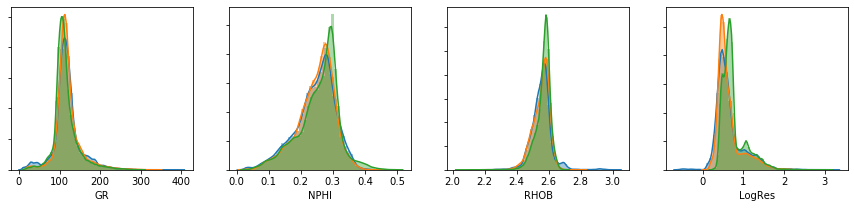

In [56]:
fig, axs = plt.subplots(ncols=4, figsize=(15,3))

for ax, feature in zip(axs, features):
    sns.distplot(df_train[feature], ax=ax)
    sns.distplot(df_val[feature], ax=ax)
    sns.distplot(df_test[feature], ax=ax)
    ax.set_yticklabels([])

## Make `X` and `y`

In [57]:
X_train = df_train[features].values
y_train = df_train[target].values

X_val = df_val[features].values
y_val = df_val[target].values

X_test = df_test[features].values
y_test = df_test[target].values

## Standardize

It's sensible to standardize the data before linear regression. This transforms all of the features to their Z-scores. That is, we subtract the mean and divide by the standard deviation. 

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Train a model

In [89]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
df_val['DT_pred_LR'] = regr.predict(X_val)

df_val.head()

,Well,Depth,CAL,GR,SP,RES,NPHI,RHOB,DT,LogRes,...,GR.LogRes,NPHI.RHOB,NPHI.LogRes,RHOB.LogRes,InvGardner,NPHI_Smooth,NPHI_sq,DT_pred_LR,DT_pred_L2,DT_pred_L1
361088,70,1591.6656,7.9294,96.5902,-36.2480,4.2553,0.2360,2.5569,81.7599,0.628930,...,60.748492,0.603428,0.148428,1.608112,4616.137410,0.127524,0.055696,77.717417,77.561433,76.096057
361089,70,1591.8180,7.8347,88.0570,-36.2602,4.2799,0.2318,2.5665,81.9724,0.631434,...,55.602150,0.594915,0.146366,1.620574,4685.854830,0.139052,0.053731,77.486343,77.336530,76.360191
361090,70,1591.9704,7.7835,90.6360,-36.1782,4.2534,0.2658,2.5581,82.3065,0.628736,...,56.986137,0.679943,0.167118,1.608370,4624.809263,0.150657,0.070650,79.027997,78.961706,78.958928
361091,70,1592.1228,7.7725,98.7434,-36.1113,4.2273,0.2623,2.5294,82.4518,0.626063,...,61.819596,0.663462,0.164216,1.583564,4420.728184,0.161281,0.068801,80.908294,80.797904,80.022491
361092,70,1592.2752,7.8093,102.5581,-36.1973,4.2279,0.2473,2.5221,82.4496,0.626125,...,64.214160,0.623715,0.154841,1.579149,4369.914744,0.171848,0.061157,81.534912,81.416798,80.132368


In [147]:
def plot_track(df, idx, *cols):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15,3)
    depths = df.loc[df.Well == idx, 'Depth']
    for col in cols:
        ax.plot(depths, df.loc[df.Well == idx, col], lw=1.5, label=col)
    ax.set_xlim(1300, 2400)
    ax.set_ylim(40, 140)
    plt.legend()
    return

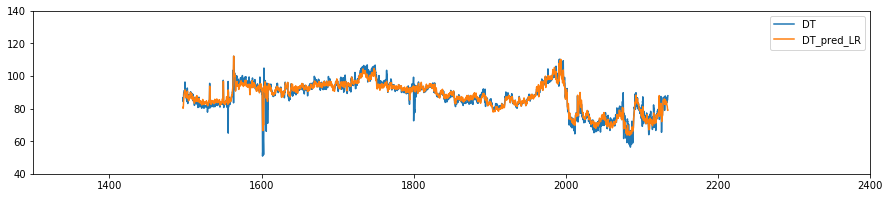

In [148]:
@interact(idx=(df_val.Well.unique().min(), df_val.Well.unique().max(), 1))
def plot_different_wells(idx=76):
    plot_track(df_val, idx, 'DT', 'DT_pred_LR')
    return

# Evaluation metrics

Two convenient ways to evaluate regressions are with the $R^2$ score...

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(df_val.DT, df_val.DT_pred_LR)

0.8649598445760998

And the RMS error:

In [94]:
np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_LR))

3.2931371654279005

## Other linear regressors

Linear regression by ordinary least squares (`LinearRegression` model) tries to find the best weights or coefficients, and their values are unconstrained. 

Sometimes we want to constrain them a little, to try to make a 'simpler' model and prevent overfitting.

For example, `Ridge` adds an L2 penalty to the weights. In other words, it tries to keep the weight vector as small ('short', or low magnitude) as possible. In geophysics, this is sometimes referred to as [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization).

In [95]:
lr_coef = regr.coef_

In [96]:
regr = Ridge(alpha=1.0)

regr.fit(X_train, y_train)

df_val['DT_pred_L2'] = regr.predict(X_val)

print('r2_score ', r2_score(df_val.DT, df_val.DT_pred_L2))
print('RMS error', np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_L2)))

r2_score  0.8661193316382205
RMS error 3.2789688551974736


In [97]:
l2_coef = regr.coef_

Alternatively, we can try to minimize the L1 norm of the weight vector. This tries to keep as many coefficients as possible at 0. If you believe there to be only a few important features, it would be sensible to try this.

This regressor is called [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)).

In [98]:
regr = Lasso(alpha=1.0)

regr.fit(X_train, y_train)

df_val['DT_pred_L1'] = regr.predict(X_val)

print('r2_score ', r2_score(df_val.DT, df_val.DT_pred_L1))
print('RMS error', np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_L1)))

r2_score  0.8488552898131126
RMS error 3.4839734103129203


In [99]:
l1_coef = regr.coef_  

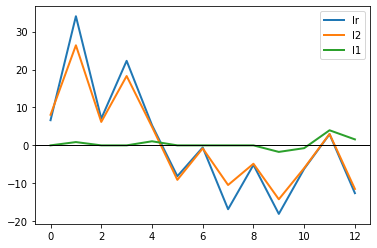

In [108]:
for coef, data in {'lr': lr_coef, 'l2': l2_coef, 'l1': l1_coef}.items():
    plt.plot(data, lw=2, label=coef)
plt.axhline(0, c='k', lw=1)
plt.legend()

## Check error distribution

In particular, we want to check that:

1. The errors are normally distributed with a zero mean.
1. The variance of the errors is not correlated with the parameters.

There's some good advice about normality tests in [this article by Jason Brownlee](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/).

First we'll just use visual inspection:

In [119]:
residuals = df_val['DT_pred_LR'] - df_val['DT']

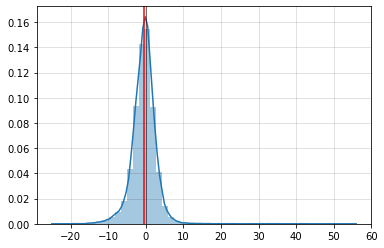

In [120]:
sns.distplot(residuals)
plt.axvline(0, color='k', lw=0.5)
plt.axvline(residuals.mean(), color='r')
plt.grid(color='k', alpha=0.15)
plt.show()

#### Normality: QQ plot

A quantile-quantile plot generates an idealized distribution, in this case a Gaussian. The idealized samples are divided into quantiles, then each data point in the sample is paired with a similar member from the idealized distribution. The line `'s'` represents the standard 'normal' distribution.

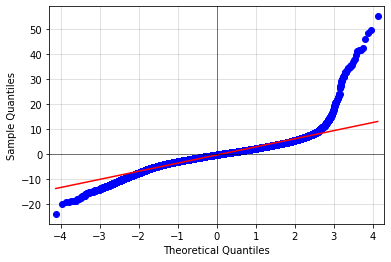

In [121]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.axvline(0, color='k', lw=0.5)
plt.axhline(0, color='k', lw=0.5)
plt.grid(color='k', alpha=0.15)
plt.show()

#### Normality: Shapiro&ndash;Wilk test

Not convinced about this &mdash; seems like most large samples don't fit. `p` just gets very small.

In [122]:
from scipy.stats import shapiro

res_shuf = residuals.values
np.random.shuffle(res_shuf)

stat, p = shapiro(res_shuf[:500])
print(f'Statistics = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.783, p = 0.000
Sample does not look Gaussian (reject H0)


#### Homoscedasticity: visual inspection

We want to check that the variance of the errors is not correlated with our parameters.

If they are correlated (if the plots below show points with narrow spread at one end and wide at the other), then there are nonlinearities in the data that are not captured by the model. It could be that outliers are skewing the distribution.

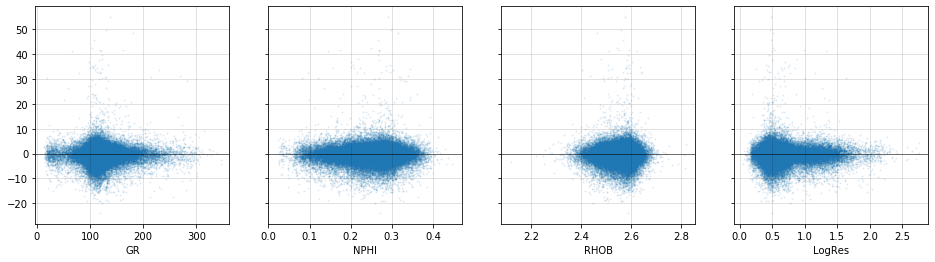

In [123]:
fig, axs = plt.subplots(ncols=4, figsize=(16,4), sharey=True)

for ax, feature in zip(axs, features):
    ax.scatter(df_val[feature], residuals, s=1, alpha=0.1)
    ax.set_xlabel(feature)
    ax.axhline(0, color='k', lw=0.5)
    ax.grid(color='k', alpha=0.15)

## Coefficients

**If the features have been standardized**, then we can interpret the learned coefficients (or parameters, or weights if you prefer) as feature importance.

In [124]:
np.set_printoptions(suppress=True)
regr.coef_

array([ 0.        ,  0.86692243, -0.        , -0.        ,  1.07694628,
        0.        , -0.        ,  0.        , -0.        , -1.72650261,
       -0.73513241,  3.98220279,  1.57763924])

In [125]:
regr.intercept_

84.939134521376

Can you make a list of the features ordered by their coefficients?

In [126]:
list(reversed(np.array(features)[np.argsort(np.abs(regr.coef_))]))

['NPHI_Smooth',
 'RHOB.LogRes',
 'NPHI_sq',
 'GR.NPHI',
 'NPHI',
 'InvGardner',
 'NPHI.LogRes',
 'NPHI.RHOB',
 'GR.LogRes',
 'GR.RHOB',
 'LogRes',
 'RHOB',
 'GR']

## `statsmodels`: Confidence interval and prediction interval

Often, we'd like to know the range of possible responses. Scikit-learn is for predictions, and doesn't have a lot of tools for in-sample statistics. For that, we need to use `statsmodels` or some other statistical package. 

Check out [this notebook by Matteo Niccoli](https://github.com/mycarta/Data-science-tools-petroleum-exploration-and-production/blob/master/Python/notebooks/Python_OLS_confidence_interval_and_prediction_interval.ipynb)

For regression of a variable y on a single independent variable x, you can also use `seaborn`, e.g. [see this help page](https://seaborn.pydata.org/tutorial/regression.html).

In [127]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

X_train_s = sm.add_constant(X_train)  # Intercept not included by default.

reg = sm.OLS(y_train, X_train_s).fit()  # Fit the model.

_, data, columns = summary_table(reg, alpha=0.05)  # Get the results, including CI, PI.

ds = pd.DataFrame(data, columns=map(lambda s: s.replace('\n', ' '), columns))

ds.head()

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,1.0,76.6762,70.925120,0.119614,70.690672,71.159568,64.764595,77.085645,5.751080,3.138502,1.832428,0.000348
1,2.0,76.5024,71.584370,0.104237,71.380061,71.788678,65.424918,77.743822,4.918030,3.139050,1.566726,0.000193
2,3.0,75.9684,71.857220,0.088345,71.684059,72.030381,65.698723,78.015717,4.111180,3.139537,1.309486,0.000097
3,4.0,75.7419,72.321447,0.081020,72.162646,72.480249,66.163337,78.479558,3.420453,3.139735,1.089408,0.000056
4,5.0,76.5455,72.920004,0.074446,72.774086,73.065921,66.762212,79.077795,3.625496,3.139898,1.154654,0.000054


**Confidence interval** is the range we expect the **mean** to be within, for a given confidence level (default is `alpha = 0.5` or a confidence level of 95%). 

**Prediction interval** is the range we expect **a given observation** to be within at that confidence level.

Let's also check the predictive power of this model.

In [128]:
X_val_s = sm.add_constant(X_val)

df_val['DT_pred_SM'] = reg.predict(X_val_s)

These should be more or less exactly like the OLS results from `sklearn`...

In [129]:
r2_score(df_val.DT, df_val.DT_pred_SM)

0.8649598445761045

In [130]:
np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_SM))

3.2931371654278414

## Exercise: Try using a deep neural network

Have a go at doing this regression using `sklearn`'s neural network, or using TensorFlow if you prefer. See if you can beat the linear regression.

In [131]:
from sklearn.neural_network import MLPRegressor

# YOUR CODE HERE

In [132]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                   activation='relu',
                   solver='adam',
                   alpha=0.0001,
                   batch_size='auto',
                   verbose=True
                  )

In [133]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1386.24717488
Iteration 2, loss = 37.31000093
Iteration 3, loss = 7.93132204
Iteration 4, loss = 6.16955704
Iteration 5, loss = 5.25538150
Iteration 6, loss = 4.71111748
Iteration 7, loss = 4.34453873
Iteration 8, loss = 4.10123068
Iteration 9, loss = 3.93850120
Iteration 10, loss = 3.82697053
Iteration 11, loss = 3.78059210
Iteration 12, loss = 3.68718019
Iteration 13, loss = 3.65981230
Iteration 14, loss = 3.59144729
Iteration 15, loss = 3.62059894
Iteration 16, loss = 3.54094117
Iteration 17, loss = 3.55111674
Iteration 18, loss = 3.50552264
Iteration 19, loss = 3.50572444
Iteration 20, loss = 3.41695658
Iteration 21, loss = 3.41062108
Iteration 22, loss = 3.37382092
Iteration 23, loss = 3.39713898
Iteration 24, loss = 3.41388910
Iteration 25, loss = 3.35351368
Iteration 26, loss = 3.28790187
Iteration 27, loss = 3.29236470
Iteration 28, loss = 3.32745230
Iteration 29, loss = 3.31088633
Iteration 30, loss = 3.33184554
Iteration 31, loss = 3.27140631
Iteration 32,

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 64, 32), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [134]:
df_val['DT_pred_NN'] = mlp.predict(X_val)

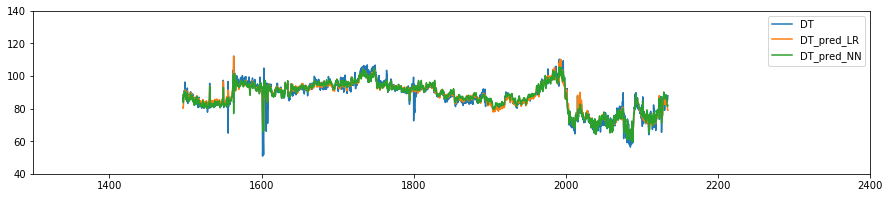

In [149]:
@interact(idx=(df_val.Well.unique().min(), df_val.Well.unique().max(), 1))
def plot_different_wells(idx=76):
    plot_track(df_val, idx, 'DT', 'DT_pred_LR', 'DT_pred_NN')
    return

In [137]:
r2_score(df_val.DT, df_val.DT_pred_NN)

# Previously about 0.86

0.8813299191699457

In [138]:
np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_NN))

# Previously 3.504

3.0870877527783143

## Using TensorFlow

In [141]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Hidden layer.
model.add(tf.keras.layers.Dense(128, input_dim=len(features), activation='elu'))
model.add(tf.keras.layers.Dense(64, activation='elu'))
model.add(tf.keras.layers.Dense(32, activation='elu'))

# Output layer.
model.add(tf.keras.layers.Dense(1))

# Compile the graph.
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])

In [142]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=1024,
          validation_data=(X_val, y_val),
         )

Train on 30274 samples, validate on 54160 samples
Epoch 1/100
30274/30274 [==============================] - 1s 21us/sample - loss: 6821.7267 - mse: 6821.7271 - val_loss: 6096.4455 - val_mse: 6096.4463
Epoch 2/100
30274/30274 [==============================] - 0s 7us/sample - loss: 4146.8456 - mse: 4146.8457 - val_loss: 2486.2890 - val_mse: 2486.2893
Epoch 3/100
30274/30274 [==============================] - 0s 8us/sample - loss: 1833.7362 - mse: 1833.7363 - val_loss: 1456.4743 - val_mse: 1456.4745
Epoch 4/100
30274/30274 [==============================] - 0s 8us/sample - loss: 1183.6476 - mse: 1183.6477 - val_loss: 912.6784 - val_mse: 912.6785
Epoch 5/100
30274/30274 [==============================] - 0s 9us/sample - loss: 621.6963 - mse: 621.6962 - val_loss: 382.9601 - val_mse: 382.9601
Epoch 6/100
30274/30274 [==============================] - 0s 8us/sample - loss: 216.4072 - mse: 216.4072 - val_loss: 81.9758 - val_mse: 81.9758
Epoch 7/100
30274/30274 [==============================

In [143]:
df_val['DT_pred_TF'] = np.squeeze(model.predict(X_val))

In [144]:
r2_score(df_val.DT, df_val.DT_pred_TF)

0.8672324619488403

In [145]:
np.sqrt(mean_squared_error(df_val.DT, df_val.DT_pred_TF))

3.2653091609210967

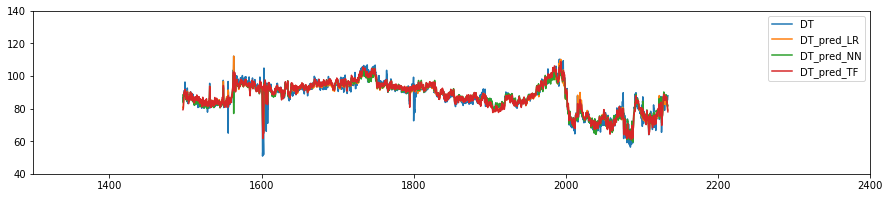

In [150]:
@interact(idx=(df_val.Well.unique().min(), df_val.Well.unique().max(), 1))
def plot_different_wells(idx=76):
    plot_track(df_val, idx, 'DT', 'DT_pred_LR', 'DT_pred_NN', 'DT_pred_TF')
    return